In [7]:
# here put the import lib

import pandas as pd
import ydata_profiling
import numpy as np

def ts_profiling(df: pd.DataFrame, output_file: str = "profiling_report.html") -> None:
    profile = ydata_profiling.ProfileReport(df, tsmode=True)
    profile.to_file(output_file)
raw_data  = pd.read_csv(r"data\qiyeshuju-4S间隔.csv", encoding="gbk")
raw_data.index = pd.to_datetime(raw_data["时间"])
raw_data.drop("时间", axis=1, inplace=True)

In [10]:
raw_data.columns

Index(['右侧换火信号', 'CEMS出口烟尘($mg/m^{3}$)', 'CEMS出口一氧化氮($mg/m^{3}$)',
       'VA.SO2($mg/m^{3}$)', 'VA.NOX($mg/m^{3}$)', 'CEMS出口含氧(%)', 'VA.O2(%)',
       'NOX转换值($mg/m^{3}$)', '氨水泵B频率反馈(Hz)', '1#线氨水流量(L/h)', 'C泵频率反馈(Hz)',
       '反应塔入口温度', '1#线氨水调节阀(L/h)', '反应塔出口温度', 'CCF出口温度', '氨水分段设定反馈($m^{3}/h$)',
       'CCF6温度', 'CCF5温度', 'CCF4温度', 'CCF3温度', 'CCF2温度', '出口CEMS温度', 'CCF1温度',
       'CCF7温度', '喷氨压缩空气压力', 'CCF1差压', 'CCF2差压', 'CCF3差压', 'CCF4差压', 'CCF5差压',
       '反应塔差压', 'CCF6差压', 'B变频器电流(A)', 'A变频器电流(A)', 'B输出频率(Hz)',
       '氨逃逸小时均值($mg/m^{3}$)', 'A输出频率(Hz)', 'CCF7差压', '烟气量($Nm^{3}/h$)',
       'CCF出口压力', 'CEMS出口流量(m/s)', '22出口CEMS温度', '22CEMS出口烟尘($mg/m^{3}$)',
       '出口CEMS湿度(%)', '22烟气量($Nm^{3}/h$)', '右侧换火信号-数值'],
      dtype='object')

In [15]:
# 获取一天的数据
print(raw_data.index) 
one_data = raw_data["2024-01-01 00:00:00":"2024-01-01 23:59:59"]

DatetimeIndex(['2023-12-11 18:48:28', '2023-12-11 18:48:32',
               '2023-12-11 18:48:36', '2023-12-11 18:48:40',
               '2023-12-11 18:48:44', '2023-12-11 18:48:48',
               '2023-12-11 18:48:52', '2023-12-11 18:48:56',
               '2023-12-11 18:49:00', '2023-12-11 18:49:04',
               ...
               '2024-01-12 17:09:32', '2024-01-12 17:09:36',
               '2024-01-12 17:09:40', '2024-01-12 17:09:44',
               '2024-01-12 17:09:48', '2024-01-12 17:09:52',
               '2024-01-12 17:09:56', '2024-01-12 17:10:00',
               '2024-01-12 17:10:04', '2024-01-12 17:10:08'],
              dtype='datetime64[ns]', name='时间', length=690336, freq=None)


<Axes: xlabel='时间'>

d:\ProgramData\Anaconda3\envs\t\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  func(*args, **kwargs)
d:\ProgramData\Anaconda3\envs\t\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  func(*args, **kwargs)
d:\ProgramData\Anaconda3\envs\t\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ProgramData\Anaconda3\envs\t\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


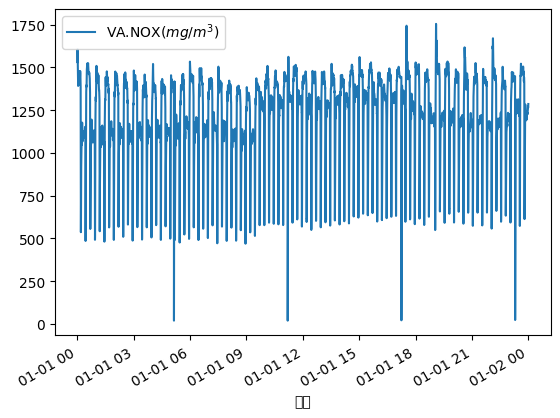

In [17]:
one_data[[r"VA.NOX($mg/m^{3}$)"]].plot()
# one_data.head()

In [ ]:
train_data = one_data[[r"VA.NOX($mg/m^{3}$)"]].iloc[:int(len(one_data)*0.8)] # 训练数据
test_data = one_data[[r"VA.NOX($mg/m^{3}$)"]].iloc[int(len(one_data)*0.8):] # 测试数据

